In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# GBM parameters
M0 = 100.0
sigma = 0.8
T = 1.0/365.25/24 # this the year fraction corresponding to one hour
N = 3600 # place one order per second (as long as T above is one hour)

numMCSamples = 1000 # so we can consider some stats 

muHat = -0.5*sigma*sigma*T
sigmaHat = np.sqrt(N*T)*sigma

print("1 + muHat = "+str(1 + muHat))
print("sigma = "+str(sigma))

timeGrid = np.linspace(0,T,N)
priceLevels = np.zeros([numMCSamples,N])
priceLevels[:,0] = M0

1 + muHat = 0.9999634953228382
sigma = 0.8


Simplest case: we generate the shocks as normal r.v. that's just an initial sanity check

In [43]:
shocksX = np.random.normal(muHat, sigmaHat,(numMCSamples,N))

for i in range(0,N-1):
    Y = np.exp(shocksX[:,i]/N)
    priceLevels[:,i+1] = priceLevels[:,i]*Y

In [44]:
priceRatio = priceLevels[:,N-1]/priceLevels[:,0]
print("mean = %.3f" % np.mean(priceRatio))
sampleSigma = np.sqrt(np.var(priceRatio)/T)
print('sample stddev = %.3f, wanted sigma= %.3f' % (sampleSigma, sigma))

mean = 1.000
sample stddev = 0.781, wanted sigma= 0.800


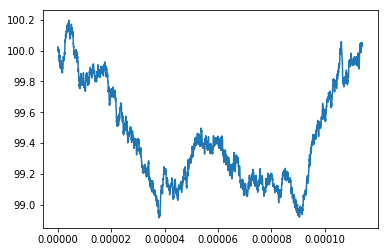

In [45]:
plt.plot(timeGrid, priceLevels[0,:])
plt.show()

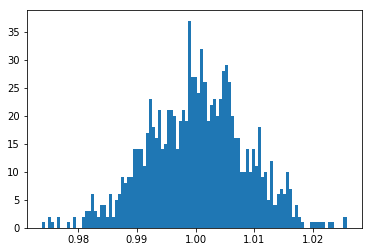

In [46]:
plt.hist(priceRatio, bins=100)
plt.show()

What happens if we try to round to discrete price levels?

mean = 1.000
sample stddev = 0.123, wanted sigma= 0.800


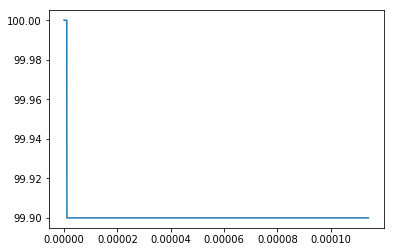

In [51]:
shocksX = np.random.normal(muHat, sigmaHat,(numMCSamples,N))

for i in range(0,N-1):
    Y = np.exp(shocksX[:,i]/N)
    priceLevels[:,i+1] = np.round(priceLevels[:,i]*Y,1)
    
priceRatio = priceLevels[:,N-1]/priceLevels[:,0]
print("mean = %.3f" % np.mean(priceRatio))
sampleSigma = np.sqrt(np.var(priceRatio)/T)
print('sample stddev = %.3f, wanted sigma= %.3f' % (sampleSigma, sigma))

plt.plot(timeGrid, priceLevels[0,:])
plt.show()


So we cannot deal with discrete prices by simply rounding / bucketing as that's reducing the desired volatility.

Now let's be a bit more funky: we have minimum tick size so we want to generate the shocks such that we exceed the minimum tick size, while still having the correct first two moments. On top of that we want to generate a move that is always positive and decide the side of the book with a bernoulli r.v.



In [14]:
#the minimum tick size, so that valid prices are ... 99.98, 99.99, 100.00, 100.01, 100.02, 100.03, ...
delta = 0.01 

minShockX = N*np.log(1.0+delta/M0)
print(minShockX)



0.35998200119987034
